# 2021/12/28
# 本代码绘制论文v1.1中的图3
# 925hpa降水与风场

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

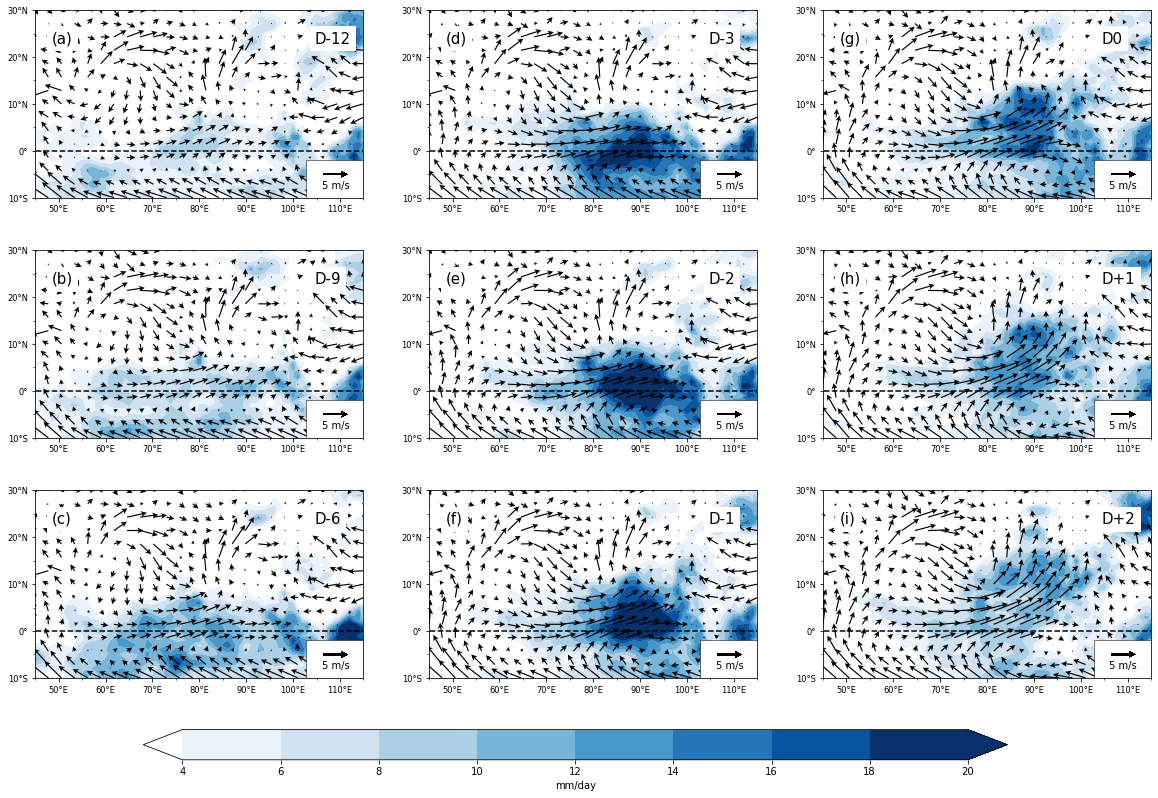

In [2]:
path  =  "/home/sun/qomo-data/"
level =  925
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f  =  xr.open_dataset(path+"composite3.nc").sel(level=level,lon=lon_slice,lat=lat_slice)   
f2 =  xr.open_dataset(path+"composite_GPCP.nc").sel(lon=lon_slice,lat=lat_slice)
f3 =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('Blues', 16)
newcolors = viridis(np.linspace(0, 1, 16))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
#newcmp.set_over('brown')

j = 0
    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f2.lon,f2.lat,f2.precipitation[date[j],:],levels=np.linspace(4,20,9),cmap=newcmp,alpha=1,extend='both')
            q  =  ax.quiver(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', ec='k', lw=0.5, zorder=1.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08,)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='mm/day')


plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig3_version1.3_2mwind_prect_gpcp.pdf", bbox_inches='tight', dpi=1200)
plt.show()

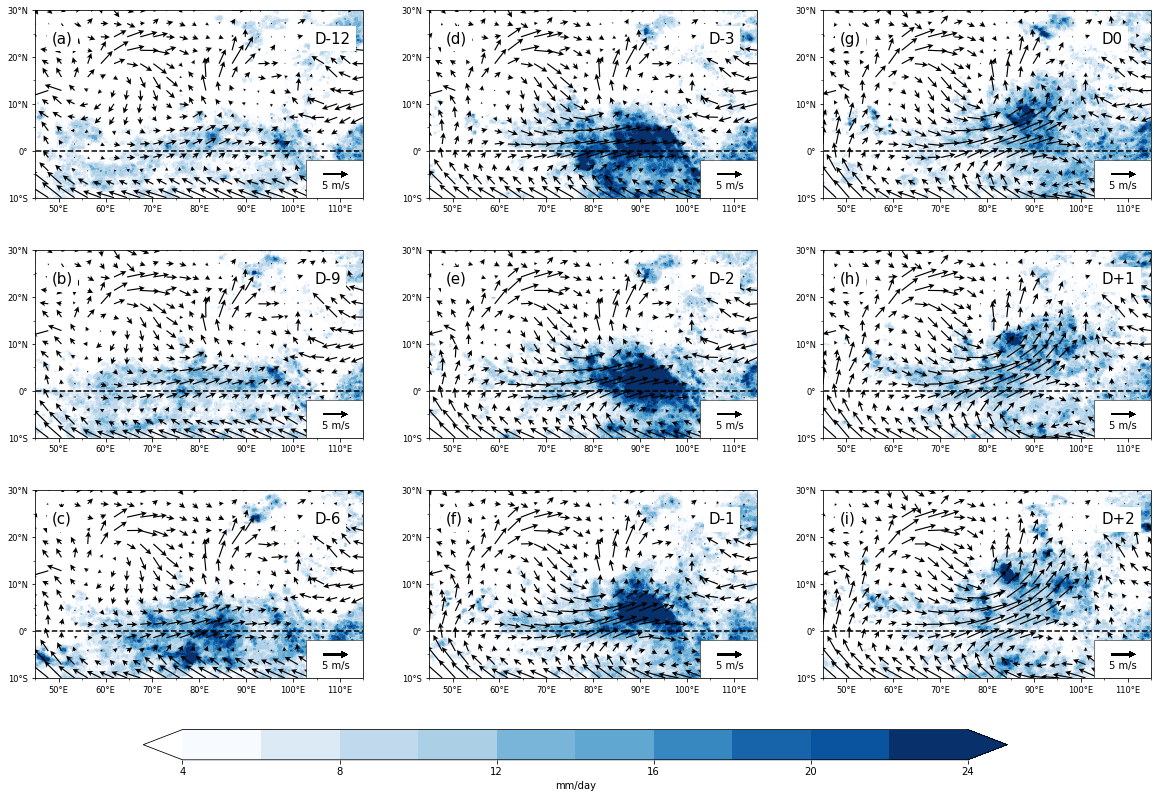

In [3]:
path  =  "/home/sun/qomo-data/"
level =  925
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f  =  xr.open_dataset(path+"composite3.nc").sel(level=level,lon=lon_slice,lat=lat_slice)   
f2 =  xr.open_dataset(path+"composite-precipitation_trmm.nc").sel(lon=lon_slice,lat=lat_slice)
f3 =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dates  =  [-12,-9,-6,-3,-2,-1,0,1,2] #总共9张图
date   =  [18,21,24,27,28,29,30,31,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('Blues', 16)
newcolors = viridis(np.linspace(0, 1, 16))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
#newcmp.set_over('brown')

j = 0
    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f2.lon,f2.lat,np.swapaxes(f2.precipitation[date[j],:],0,1),levels=np.linspace(4,24,11),cmap=newcmp,alpha=1,extend='both')
            #im  =  ax.contour(f2.lon,f2.lat,np.swapaxes(f2.precipitation[date[j],:],0,1),levels=np.linspace(4,24,11),alpha=1)
            q  =  ax.quiver(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', ec='k', lw=0.5, zorder=1.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08,)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='mm/day')


plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig3_version1.3_2mwind_prect_trmm.pdf", bbox_inches='tight', dpi=1200)
plt.show()

## 2022-2-11
## 修改：加个海温，降水用等值线
## 这里对降水进行插值

In [4]:
path  =  "/home/sun/qomo-data/"
f1 =  xr.open_dataset(path+"composite_OISST_trans.nc").sel(lon=lon_slice,lat=lat_slice)
f2 =  xr.open_dataset(path+"composite-precipitation_trmm.nc")
f3 =  xr.open_dataset(path+"composite-merra2-single.nc")

new_lon  =  f1.lon.data
new_lat  =  np.linspace(-50,50,101)

in_prect_1  =  np.zeros((f2.time.shape[0],f2.lat.shape[0],new_lon.shape[0]))
in_prect_2  =  np.zeros((f2.time.shape[0],new_lat.shape[0],new_lon.shape[0]))          

old_prect  =  f2.precipitation.data.swapaxes(2,1) 

for tt in range(f2.time.shape[0]):
    for yy in range(f2.lat.shape[0]):
        in_prect_1[tt,yy,:]  =  np.interp(new_lon,f2.lon.data,old_prect[tt,yy,:])
        
for tt in range(f2.time.shape[0]):
    for xx in range(new_lon.shape[0]):
        in_prect_2[tt,:,xx]  =  np.interp(new_lat,f2.lat.data,in_prect_1[tt,:,xx])



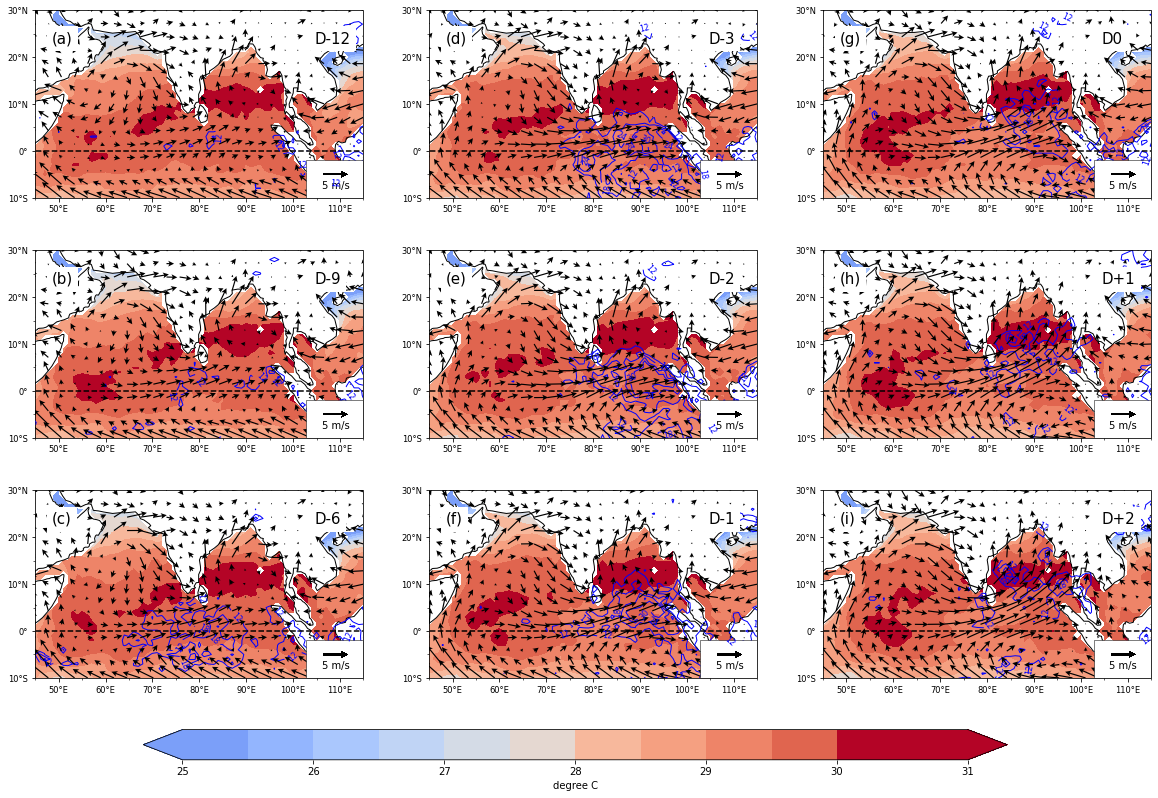

In [5]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=3)

viridis = cm.get_cmap('coolwarm', 16)
newcolors = viridis(np.linspace(0.2, 1, 15))
newcmp = ListedColormap(newcolors)
#newcmp.set_under('blue')
#newcmp.set_over('red')

j = 0
    
for col in range(3):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contour(new_lon,new_lat,in_prect_2[date[j],:],levels=np.arange(12,35,6),colors='b',linewidths=1,alpha=1,zorder=1)
            ax.clabel(im, inline=True, fontsize=8)
            im2 =  ax.contourf(f1.lon,f1.lat,f1.sst[date[j],:],levels=np.linspace(25,31,13),cmap=newcmp,extend='both',zorder=0)
            q  =  ax.quiver(f3.lon, f3.lat, f3.U2M.data[date[j],:], f3.V2M.data[date[j],:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5,zorder=2)
            if dates[j]<0:
                ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            elif dates[j]>0:
                 ax.text(0.85,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                 ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', 
                                         ec='k', lw=0.5,zorder=2.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='degree C')


plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig3_version1.3_2mwind_prect_trmm_oisst.pdf", bbox_inches='tight', dpi=1200)
plt.show()

In [6]:
newcolors.append(newcolors)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
newcolors.shape

In [ ]:
newcolors